In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_implicit_solvent.utils import remove_top_right_spines
%matplotlib inline

In [2]:
path = '../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_run_n_compounds=315_n_iter=10000_gaussian_ll.pkl'

In [3]:
from pickle import load

with open(path, 'rb') as f:
    result = load(f)

In [4]:
result.keys()

dict_keys(['traj', 'log_probs', 'log_acceptance_probabilities'])

In [5]:
traj = result['traj']

In [6]:
log_probs = result['log_probs']

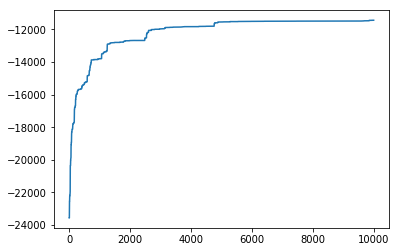

In [7]:
plt.plot(log_probs)

In [8]:
traj[0]

*          (r = 1.50 Å, s = 0.80)
|-[#1]     (r = 1.20 Å, s = 0.85)
|-[#6]     (r = 1.70 Å, s = 0.72)
|-[#7]     (r = 1.55 Å, s = 0.79)
|-[#8]     (r = 1.50 Å, s = 0.85)
|-[#9]     (r = 1.50 Å, s = 0.88)
|-[#15]    (r = 1.85 Å, s = 0.86)
|-[#16]    (r = 1.80 Å, s = 0.96)
|-[#17]    (r = 1.50 Å, s = 0.80)
|-[#35]    (r = 1.50 Å, s = 0.80)
|-[#53]    (r = 1.50 Å, s = 0.80)

In [9]:
traj[-1]

*                  (r = 1.77 Å, s = 0.80)
|-[#1]             (r = 0.43 Å, s = 0.85)
|-[#6]             (r = 1.91 Å, s = 0.72)
  |-[#6&X3]        (r = 1.99 Å, s = 0.73)
    |-[#6&X3&A]    (r = 1.89 Å, s = 0.72)
|-[#7]             (r = 1.77 Å, s = 0.79)
  |-[#7&a]         (r = 2.06 Å, s = 0.79)
    |-[#7&a&X3]    (r = 1.75 Å, s = 0.80)
  |-[#7&X1]        (r = 2.33 Å, s = 0.80)
|-[#8]             (r = 1.64 Å, s = 0.85)
  |-[#8&X1]        (r = 1.87 Å, s = 0.85)
|-[#9]             (r = 1.94 Å, s = 0.88)
|-[#15]            (r = 1.95 Å, s = 0.86)
|-[#16]            (r = 2.58 Å, s = 0.96)
  |-[#16&X2]       (r = 2.11 Å, s = 0.96)
  |-[#16&X3]       (r = 2.28 Å, s = 0.95)
|-[#17]            (r = 1.98 Å, s = 0.80)
|-[#35]            (r = 1.87 Å, s = 0.80)
|-[#53]            (r = 2.78 Å, s = 0.80)

In [10]:
from bayes_implicit_solvent.continuous_parameter_experiments.gradient_free import mols

number of molecules being considered: 642


In [11]:
mol = mols[0]

In [12]:

from simtk import unit

from simtk import unit
from bayes_implicit_solvent.constants import beta
def unreduce(value):
    """Input value is in units of kB T, turn it into units of kilocalorie_per_mole"""
    return value / (beta * unit.kilocalorie_per_mole)

def make_predictions(tree):
    predictions = []
    for mol in mols:
        radii = tree.assign_radii(mol.mol) / unit.nanometer
        scales = tree.assign_scale_factors(mol.mol)
        predictions.append(mol.predict_solvation_free_energy(radii, scales)[0])
    return unreduce(np.array(predictions))

In [13]:
initial_predictions = make_predictions(traj[0])

In [14]:
final_predictions = make_predictions(traj[-1])

In [15]:
expt_values = unreduce(np.array([mol.experimental_value for mol in mols]))

In [16]:
(np.sqrt(np.mean((initial_predictions - expt_values)**2)))

2.5135307617515825

In [17]:
(np.sqrt(np.mean((final_predictions - expt_values)**2)))

2.1283828779798943

In [18]:
np.random.seed(0)
all_inds = np.arange(len(mols))
np.random.shuffle(all_inds)
train_inds = all_inds[::2]
test_inds = all_inds[1::2]

In [19]:
train_rmse = (np.sqrt(np.mean((final_predictions[train_inds] - expt_values[train_inds])**2)))
test_rmse = (np.sqrt(np.mean((final_predictions[test_inds] - expt_values[test_inds])**2)))
train_rmse, test_rmse

(1.9030330217942066, 2.3320576040305623)

In [20]:
len(traj)

10001

In [21]:
from tqdm import tqdm
thinning = 100
prediction_traj = [make_predictions(tree) for tree in tqdm(traj[::thinning])]

100%|██████████| 101/101 [09:41<00:00,  6.13s/it]


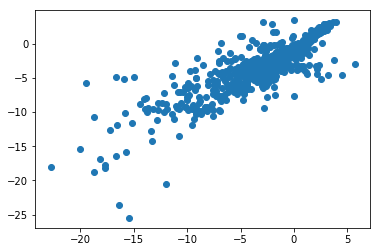

In [199]:
plt.scatter(prediction_traj[0], expt_values)

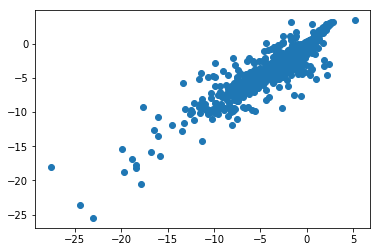

In [200]:
plt.scatter(prediction_traj[-1], expt_values)

In [201]:
tree

*              (r = 1.43 Å, s = 1.03)
|-[#1]         (r = 1.01 Å, s = 0.89)
|-[#6]         (r = 1.60 Å, s = 0.84)
  |-[#6&X3]    (r = 1.78 Å, s = 0.81)
  |-[#6&X2]    (r = 2.08 Å, s = 0.92)
|-[#7]         (r = 1.39 Å, s = 0.76)
  |-[#7&a]     (r = 1.32 Å, s = 0.79)
|-[#8]         (r = 1.66 Å, s = 0.92)
  |-[#8&X2]    (r = 1.38 Å, s = 0.90)
|-[#9]         (r = 2.05 Å, s = 0.73)
|-[#15]        (r = 1.89 Å, s = 0.78)
|-[#16]        (r = 2.20 Å, s = 0.85)

In [202]:
len(prediction_traj)

1001

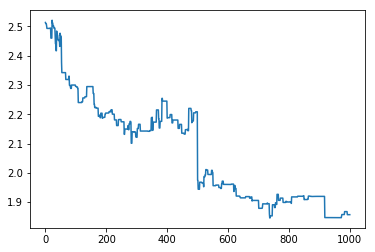

In [203]:
rmses = [np.sqrt(np.mean((snapshot - expt_values)**2)) for snapshot in prediction_traj]
plt.plot(rmses)

In [204]:
train_rmses = [np.sqrt(np.mean((snapshot[train_inds] - expt_values[train_inds])**2)) for snapshot in prediction_traj]
test_rmses = [np.sqrt(np.mean((snapshot[test_inds] - expt_values[test_inds])**2)) for snapshot in prediction_traj]

In [205]:
x = np.arange(len(result['traj']))[::thinning]
x

array([   0,    1,    2, ...,  998,  999, 1000])

(1.7553590624516795, 1.9271592101230681)

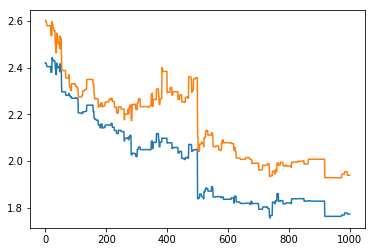

In [206]:
plt.plot(x, train_rmses)
plt.plot(x, test_rmses)

min(train_rmses), min(test_rmses)

(1.7655892161001587, 1.8440923650675092)

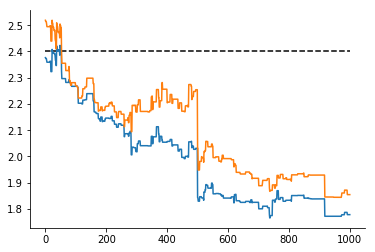

In [207]:
ax = plt.subplot(111)
remove_top_right_spines(ax)

train_mask = train_inds[expt_values[train_inds] > -15]
test_mask = test_inds[expt_values[test_inds] > -15]

n_train = len(train_mask)
n_test = len(test_mask)

train_rmses = [np.sqrt(np.mean((snapshot[train_mask] - expt_values[train_mask])**2)) for snapshot in prediction_traj]
test_rmses = [np.sqrt(np.mean((snapshot[test_mask] - expt_values[test_mask])**2)) for snapshot in prediction_traj]


# 
plt.plot(x, train_rmses, label='train (n={})'.format(n_train))
plt.plot(x, test_rmses)

plt.hlines(2.4, 0, max(x), linestyles='--')

min(train_rmses), min(test_rmses)

In [139]:
all_types = set()
for tree in traj:
    all_types.update(tree.nodes)
all_types = sorted(list(all_types))

In [140]:
all_types

['*',
 '[#15]',
 '[#16&a]',
 '[#16]',
 '[#1]',
 '[#6&X2]',
 '[#6&X3]',
 '[#6]',
 '[#7&X1]',
 '[#7&a]',
 '[#7]',
 '[#8&X2]',
 '[#8]',
 '[#9]']

In [144]:
import seaborn as sns
color_list = sns.color_palette(palette="husl", n_colors=len(all_types))
#color_list = color_list + color_list
color_dict = dict(zip(all_types, color_list))

In [177]:
# for line-plot representation
x = np.arange(len(traj))
ys = [np.zeros(len(traj)) * np.nan for _ in all_types]
c = [color_dict[t] for t in all_types]

type_dict = dict(zip(all_types, range(len(all_types))))

for time, tree in enumerate(traj):
    for n in tree.nodes:
        i = type_dict[n]
        ys[i][time] = tree.get_radius(n) / unit.angstrom

In [178]:
change_points = [np.where(np.diff(np.isnan(y)))[0] for y in ys]
change_points

[array([], dtype=int64),
 array([], dtype=int64),
 array([799, 947]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([500]),
 array([31]),
 array([], dtype=int64),
 array([575, 879]),
 array([382]),
 array([], dtype=int64),
 array([481]),
 array([], dtype=int64),
 array([], dtype=int64)]

In [179]:
list(map(len, change_points))

[0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0]

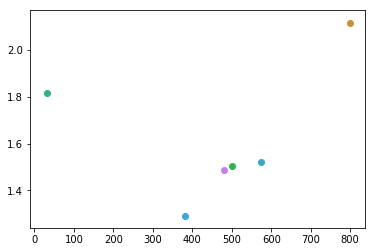

In [180]:
for i, change_point_traj in enumerate(change_points):
    if len(change_point_traj) > 0:
        plt.scatter(x[change_point_traj], ys[i][change_point_traj + 1], c=[c[i]]*len(change_point_traj))

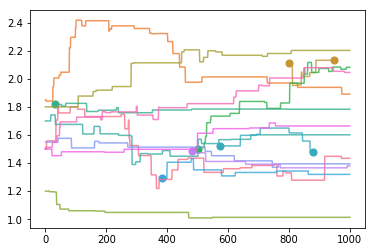

In [186]:
for i in range(len(all_types)):
    plt.plot(x, ys[i], c=c[i], alpha=0.8)
for i, change_point_traj in enumerate(change_points):
    if len(change_point_traj) > 0:
        plt.scatter(x[change_point_traj], ys[i][change_point_traj + 1], c=[c[i]]*len(change_point_traj), s=50)
        plt.scatter(x[change_point_traj], ys[i][change_point_traj - 1], c=[c[i]]*len(change_point_traj), s=50)
#plt.ylim(0,)

In [189]:
diag = np.arange(-15, 5)

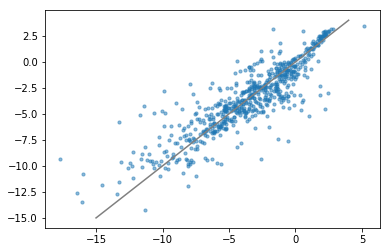

In [197]:
plt.scatter(prediction_traj[-1][expt_values > -15], expt_values[expt_values > -15], alpha=0.5, s=10)
plt.plot(diag, diag, color='grey')

In [ ]:
np.mean(prediction_traj)